## AM.SWU Winter projects [강남구 POS 데이터] EDA
### * 작성일: 22.01.20
### * 작성자: 안예린 

### 1. Sampled for internal review_transaction_gn_02_20190805.xlsx

In [1]:
# import modules
# !pip install openpyxl - 엑셀 시트는 openpyxl로 handling 하는게 더 편리 
import openpyxl
import pandas as pd 
import matplotlib.pyplot as plt

# import rawdata
transaction = openpyxl.load_workbook('../../resources/rawdata/Sampled for internal review_transaction_gn_02_20190805.xlsx')

In [11]:
transaction

In [14]:
sheets_names = transaction.get_sheet_names()
print(sheets_names)

['Sheet 1', 'Sheet 2', 'Sheet 3', 'Sheet 4', 'Sheet 5', 'Sheet 6', 'Sheet 7', 'Sheet 8', 'Sheet 9', 'Sheet 10', 'Sheet 11']


C:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  """Entry point for launching an IPython kernel.


In [23]:
# 각 sheet Dataframe화
for i in range (len(sheets_names)):
    sheet = transaction.get_sheet_by_name(sheets_names[i])
    data = sheet.values
    col = next(data)[0:]
    
    name = sheets_names[i].replace(' ','')
    globals()[name] = pd.DataFrame(data, columns=col)

C:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
# 데이터 컬럼 변경 (기존:'store code\n매장코드' -> 변경 후: store code)
 #['store code', 'Store name', 'Date', 'Receipt number', 'Authorization date', 'Table number', 'Total sales', 'Classification', 'Menu name', 'Product code', 'Quantity', 'Sales price']
import re
Sheets = [Sheet1, Sheet2, Sheet3, Sheet4, Sheet5, Sheet6, Sheet7, Sheet8, Sheet9, Sheet10, Sheet11]

for sheet in Sheets:
    cols = sheet.columns.tolist()
    cols_new = []
    for col in cols:
        col_new = re.compile('[\n|가-힣]+').sub('',col)
        col_new = col_new.replace(' ','_')
        cols_new.append(col_new)
    sheet.columns = cols_new

Counter({'20190201': 26846, '20190202': 17422, '20190203': 10975, '20190204': 6530, '20190205': 3226})


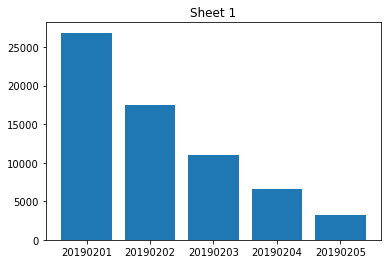

Counter({'20190201': 21793, '20190202': 15359, '20190205': 14498, '20190203': 8437, '20190204': 4912})


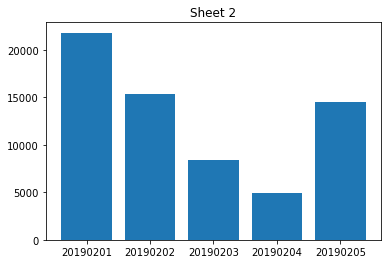

Counter({'20190201': 23447, '20190202': 18405, '20190203': 11033, '20190204': 8252, '20190205': 3862})


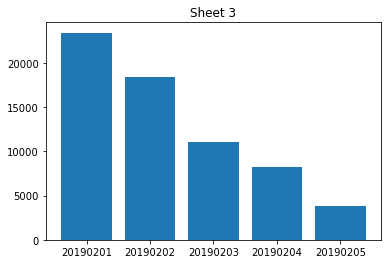

Counter({'20190201': 24825, '20190202': 16588, '20190203': 10998, '20190204': 6750, '20190205': 5838})


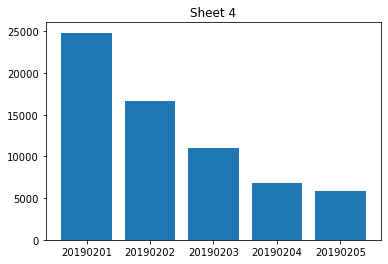

Counter({'20190201': 23643, '20190202': 17125, '20190203': 11503, '20190204': 6790, '20190205': 5938})


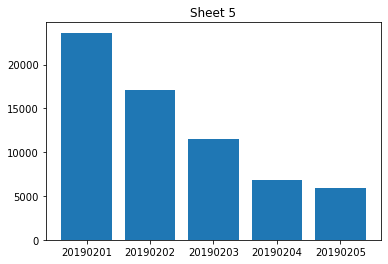

Counter({'20190201': 23191, '20190202': 17860, '20190203': 11800, '20190204': 7062, '20190205': 5086})


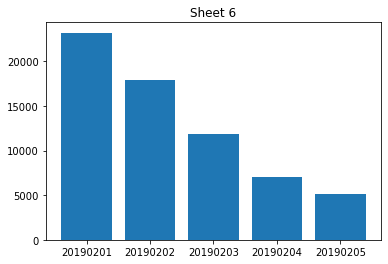

Counter({'20190201': 24317, '20190202': 17801, '20190203': 11022, '20190204': 6492, '20190205': 5367})


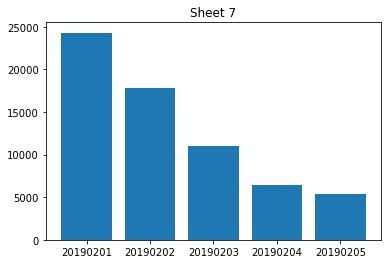

Counter({'20190201': 23588, '20190202': 16839, '20190203': 11381, '20190204': 8149, '20190205': 5042})


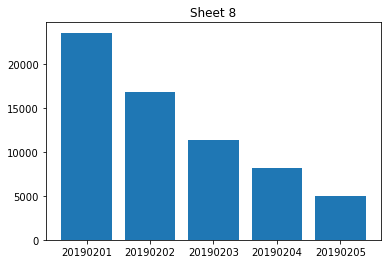

Counter({'20190201': 24265, '20190202': 18057, '20190203': 10732, '20190204': 8500, '20190205': 3445})


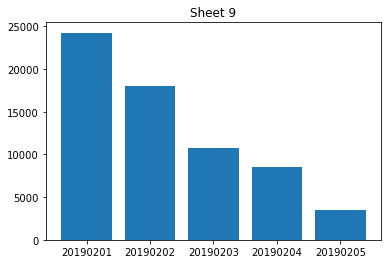

Counter({'20190201': 28336, '20190202': 15758, '20190203': 10730, '20190204': 6770, '20190205': 3405})


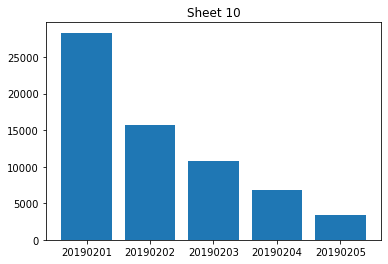

Counter({'20190201': 10427, '20190202': 6915, '20190203': 3941, '20190204': 2703, '20190205': 1559})


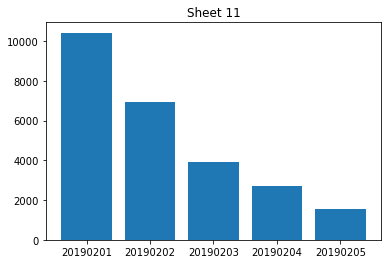

In [80]:
# 각 데이터 컬럼마다 데이터 빈도수 확인
from collections import Counter

i = 0
for Sheet in Sheets:
    data = Counter(Sheet['Date'])
    print(data)
    # sorted_data = sorted(data.items())
    myList = data.items()
    myList = sorted(myList) 
    x, y = zip(*myList) 
    plt.bar(x, y)
    plt.title(sheets_names[i])
    save_dir = '../../plot/' + sheets_names[i] +' rawdata counters'
    plt.savefig(save_dir + '.png')
    plt.show()
    i += 1


Index(['store_code', 'Store_name', 'Date', 'Receipt_number',
       'Authorization_date', 'Table_number', 'Total_sales', 'Classification',
       'Menu_name', 'Product_code', 'Quantity', 'Sales_price'],
      dtype='object')
Counter({'20190201': 21793, '20190202': 15359, '20190205': 14498, '20190203': 8437, '20190204': 4912})


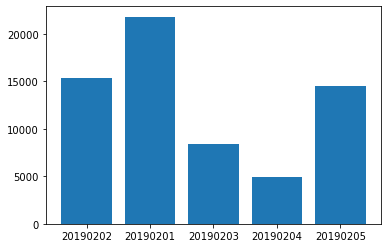

In [68]:
print(Sheet2.columns)
print(Counter(Sheet2['Date']))

plt.bar(Counter(Sheet2['Date']).keys(), Counter(Sheet2['Date']).values())
plt.show()